In [184]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [185]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [187]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [188]:
sex_counts = df['Sex'].value_counts()
sex_counts

Sex
male      577
female    314
Name: count, dtype: int64

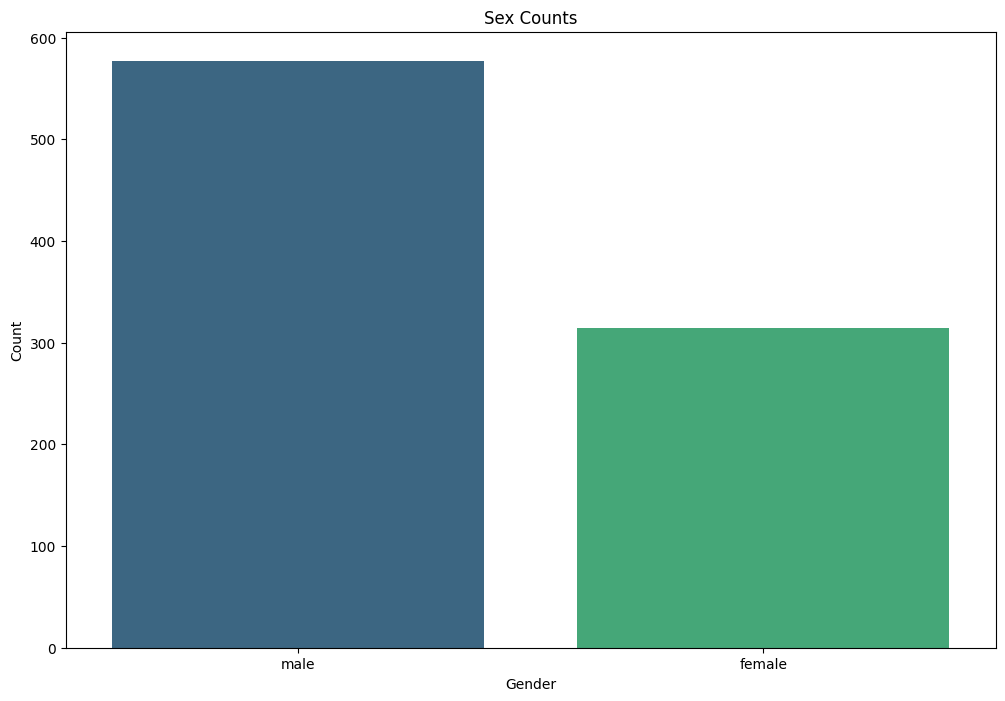

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x=sex_counts.index, y=sex_counts.values, hue=sex_counts.index, palette='viridis', dodge=False)
plt.title('Sex Counts')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [190]:
df = df.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)

In [191]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [192]:
from sklearn.preprocessing import OneHotEncoder

encoded_df = pd.get_dummies(df['Pclass'], columns=['Pclass']).astype(int)
df.drop(columns = ['Pclass'], inplace = True)
df = pd.concat([df, encoded_df], axis = 1)

In [193]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3
0,0,male,22.0,1,0,7.2500,S,0,0,1
1,1,female,38.0,1,0,71.2833,C,1,0,0
2,1,female,26.0,0,0,7.9250,S,0,0,1
3,1,female,35.0,1,0,53.1000,S,1,0,0
4,0,male,35.0,0,0,8.0500,S,0,0,1


In [194]:
df.loc[:, 'Sex'] = df.loc[:, 'Sex'].replace({'male' : 1, 'female' : 0})
df.loc[:, 'Sex'] = df.loc[:, 'Sex'].astype(int)

/tmp/ipykernel_175704/3119640925.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'Sex'] = df.loc[:, 'Sex'].replace({'male' : 1, 'female' : 0})


In [195]:
df['Embarked'].value_counts()

encded_df = pd.get_dummies(df['Embarked'], columns=['Embarked']).astype(int)
df.drop(columns = ['Embarked'], inplace = True)
df = pd.concat([df, encded_df], axis = 1)

In [196]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,1,2,3,C,Q,S
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1


In [197]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 10)
df.columns = df.columns.astype(str)

df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [198]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cond = ['Age', 'Fare']
df.loc[:, cond] = scaler.fit_transform(df.loc[:, cond])

In [199]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,1,2,3,C,Q,S
0,0.0,1.0,-0.604067,1.0,0.0,-0.502445,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.596637,1.0,0.0,0.786845,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,-0.303891,0.0,0.0,-0.488854,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.371505,1.0,0.0,0.420730,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.371505,0.0,0.0,-0.486337,0.0,0.0,1.0,0.0,0.0,1.0


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Sex       891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    float64
 4   Parch     891 non-null    float64
 5   Fare      891 non-null    float64
 6   1         891 non-null    float64
 7   2         891 non-null    float64
 8   3         891 non-null    float64
 9   C         891 non-null    float64
 10  Q         891 non-null    float64
 11  S         891 non-null    float64
dtypes: float64(12)
memory usage: 83.7 KB


In [201]:
x = np.array(df.iloc[:, 1: ])
y = np.array(df.iloc[:, 1])

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=42, train_size=0.8)

In [203]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

### Realizando a classificação com um KNN.

In [204]:
%%time

k_val = np.arange(start = 1, stop = 100, step = 1)
neigh = KNeighborsClassifier()

classifier = GridSearchCV(estimator = neigh, param_grid = {'n_neighbors' : k_val}, cv = 10)
classifier.fit(X = X_train, y = y_train)

best_param = classifier.best_params_
best_score = classifier.best_score_

CPU times: user 4.72 s, sys: 208 ms, total: 4.93 s
Wall time: 4.66 s


In [205]:
print(f"The lowest MSE is using n_neighbor = {best_param['n_neighbors']}, and is : {best_score}")

The lowest MSE is using n_neighbor = 5, and is : 0.9579029733959311


In [206]:
neigh_ = KNeighborsClassifier(n_neighbors = best_param['n_neighbors'])

neigh_.fit(X_train, y_train)
y_pred = neigh_.predict(X_test)

sum_dif = sum(y_test != y_pred)
print(f"There are a total of {sum_dif} errors in the test.")

There are a total of 7 errors in the test.


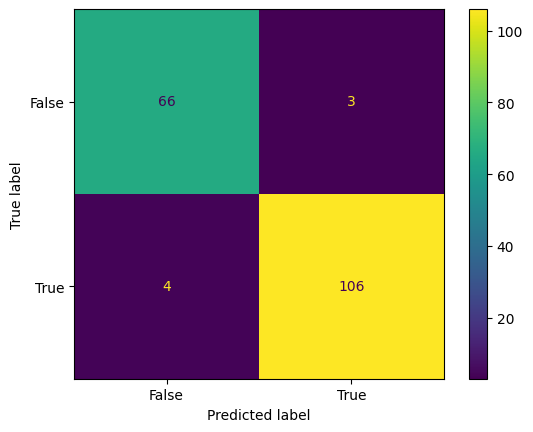

In [207]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#### Realizando a Classificação com um modelo MLP.

In [ ]:
%%time

param_grid = np.arange(start = 1, stop = 100, step = 1)

mlp = MLPClassifier(max_iter = 500, early_stopping = True)

mlp_classifier = GridSearchCV(estimator = mlp, param_grid = {'hidden_layer_sizes' : param_grid}, cv = 10)
mlp_classifier.fit(X = X_train, y = y_train.reshape(-1,))

best_mlp_score = mlp_classifier.best_score_
best_mlp_param = mlp_classifier.best_params_

In [ ]:
print(f"The lowest MSE is using hidden_layer_sizes = {best_mlp_param['hidden_layer_sizes']}, and is : {best_mlp_score}")

In [ ]:
mlp_class = MLPClassifier(hidden_layer_sizes = best_mlp_param['hidden_layer_sizes'], max_iter = 1000)

mlp_class.fit(X_train, y_train.reshape(-1,))
y_pred_mlp = mlp_class.predict(X_test)

sum_dif = sum(y_test != y_pred_mlp)
print(f"There are a total of {sum_dif} errors in the test.")

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mlp)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

#### Realizando alguns testes em algoritmos de Naive Bayes.

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred_GNB = gnb.fit(X_train, y_train).predict(X_test)

sum_dif = sum(y_test != y_pred_GNB)
print(f"There are a total of {sum_dif} errors in the test.")

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_GNB)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()